### Определение перспективного тарифа для телеком компании

#### Описание проекта
Клиентам предлагают два тарифных плана. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф выгоднее для компании.


1. [Изучение общей информации](#Шаг-1.-Изучение-общей-информации.)
2. [Предобработка данных и расчет необходимых параметров.](#Шаг-2.-Предобработка-данных-и-расчет-необходимых-параметров.)
3. [Анализ данных](#Шаг-3.-Анализ-данных.)
4. [Проверка гипотез](#Шаг-4.-Проверка-гипотез.)
5. [Общий вывод](#Шаг-5.-Общий-вывод.)

### Шаг 1. Изучение общей информации.

Импортирование модулей, необходимых для работы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import factorial
import warnings
warnings.filterwarnings('ignore')

In [2]:
def df_view(df):
    """
    Быстрый обзор таблицы
    """
    display(df)
    print(df.info())

Чтение данных и визуалиция всех таблиц

In [3]:
calls = pd.read_csv('данные предоставлены Яндекс.Практикум')
df_view(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


In [4]:
internet = pd.read_csv('данные предоставлены Яндекс.Практикум')
df_view(internet)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


In [5]:
messages = pd.read_csv('данные предоставлены Яндекс.Практикум')
df_view(messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


In [6]:
tariffs = pd.read_csv('данные предоставлены Яндекс.Практикум')
df_view(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


In [7]:
users = pd.read_csv('данные предоставлены Яндекс.Практикум')
df_view(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


#### Вывод
Данные для анализа представлены в 5 таблицах.

Таблица `tariffs` описывает 2 тарифных плана, выручку с которых и необходимо проанализировать. Остальные 4 таблицы `calls`, `internet`, `messages` и `users` имеют общий столбец `user_id`, который идентифицирует каждого конкретного пользователя и в каждой из таблиц путем изменения формата колонок `call_date`, `session_date`, `message_date` и `reg_date` из `object` в `datetime64` мы можем выделить месяц, в который который каждый пользователь совершал звонки, писал смс и пользовался интернетом. 

Из данных мы также видим, что в таблицах `calls` и `internet` есть данные с нулевым значением длительности звонков и интернет трафика, их необходимо обработать. Дробные значения минут разговора `duration` и интернет трафика `mb_used` нужно округлить до целых чисел вверх, как это делает наш "жадный" оператор и изменить тип данных на `int64`.

### Шаг 2. Предобработка данных и расчет необходимых параметров.

Используем функцию для нахождения выбросов, поскольку в таблице `calls` есть нулевые значения длительности звонков.

In [8]:
def series_analysis(data, x, w):
    """
    Функция построения графиков (и нахождения выбросов) для анализа  
    1 параметра c непрерывным распределением данных.
    data - имя датафрейма
    x - имя колонки
    w - кол-во бинов
    """
    display(data[x].describe())
    print()
    data.hist(x, bins=30)
    plt.show()
    

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

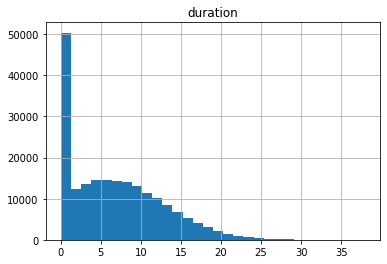

In [9]:
series_analysis(calls, 'duration', 30)    

In [10]:
calls.query('duration <= 0').count()

id           39613
call_date    39613
duration     39613
user_id      39613
dtype: int64

Из графика видно, что количество нулевых звонков составляет примерно 20%. Поскольку это скорей всего неотвеченнные звонки, которые не тарифицируются (даже нашим жадным оператором), но они значительно занижают среднее значение продолжительности звонка, поэтому мы их удалим из наших данных и посмотрим на изменение среднего и медианного значения. 

count    162994.000000
mean          8.397794
std           5.353022
min           0.010000
25%           4.170000
50%           7.740000
75%          11.850000
max          38.000000
Name: duration, dtype: float64

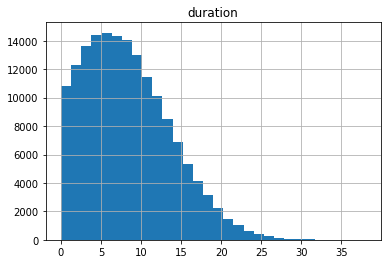

In [11]:
calls.query('duration > 0', inplace=True)
calls.reset_index(inplace=True, drop=True)

series_analysis(calls, 'duration', 30)  

Используем функцию, которая меняет формат даты с `object` в `datetime64`, округляет продолжительность до целого и меняет типа на `int64`, группирует данные таблицы по конкретному пользователю и месяцу расхода и подсчитывает количество и длительность разговора.

In [12]:
def df_grouped(df, date_column, duration):
    """
    Функция 
    """
    df[date_column] = pd.to_datetime(df[date_column], format='%Y-%m-%d')
    df['month'] = pd.to_datetime(df[date_column]).dt.month
    
    df[duration] = np.ceil(df[duration]).astype(int)
    df_gr = df.groupby(['user_id', 'month']).agg({duration: ['sum', 'count']}).reset_index()
    
    print(df_gr.info())
    display(df_gr)
    return df_gr
    

In [13]:
calls_grouped = df_grouped(calls, 'call_date', 'duration') 
calls_grouped.columns = ['user_id', 'month', 'duration_sum', 'duration_count']
calls_grouped.info()                   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 4 columns):
(user_id, )          3168 non-null int64
(month, )            3168 non-null int64
(duration, sum)      3168 non-null int64
(duration, count)    3168 non-null int64
dtypes: int64(4)
memory usage: 99.1 KB
None


user_id month duration      
                        sum count
0       1000     5      159    17
1       1000     6      172    28
2       1000     7      340    41
3       1000     8      408    42
4       1000     9      466    46
...      ...   ...      ...   ...
3163    1498    10      247    30
3164    1499     9       70     8
3165    1499    10      449    44
3166    1499    11      612    62
3167    1499    12      492    56

[3168 rows x 4 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 4 columns):
user_id           3168 non-null int64
month             3168 non-null int64
duration_sum      3168 non-null int64
duration_count    3168 non-null int64
dtypes: int64(4)
memory usage: 99.1 KB


Применим функцию series_analysis() к данным из таблицы `internet`

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

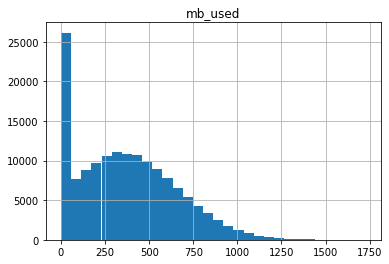

In [14]:
series_analysis(internet, 'mb_used', 30) 

Здесь мы также видим, как и в звонках большое количество нулевого трафика, не все пользователи и не каждый месяц выходят в интернет. Эти данные также удалим, чтобы не искажать среднее значение по выборке.

count    129798.000000
mean        426.087210
std         255.596447
min           0.030000
25%         227.460000
50%         400.540000
75%         592.947500
max        1724.830000
Name: mb_used, dtype: float64

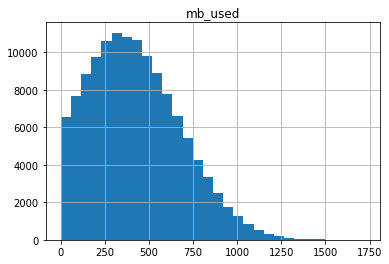

In [15]:
internet.query('mb_used > 0', inplace=True)
calls.reset_index(inplace=True, drop=True)

series_analysis(internet, 'mb_used', 30)  

Применим функцию df_grouped() к таблице `internet`, сгруппируем данные по пользователям и месяцам, подсчитаем количество Мб интернета и количество интернет-сессий для каждого пользователя в месяц.

In [16]:
internet_grouped = df_grouped(internet, 'session_date', 'mb_used') 
internet_grouped.columns = ['user_id', 'month', 'mb_used_sum', 'mb_used_count']
internet_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 4 columns):
(user_id, )         3201 non-null int64
(month, )           3201 non-null int64
(mb_used, sum)      3201 non-null int64
(mb_used, count)    3201 non-null int64
dtypes: int64(4)
memory usage: 100.2 KB
None


user_id month mb_used      
                       sum count
0       1000     5    2256     4
1       1000     6   23257    44
2       1000     7   14016    28
3       1000     8   14070    27
4       1000     9   14581    25
...      ...   ...     ...   ...
3196    1498    10   20604    49
3197    1499     9    1848     4
3198    1499    10   17809    43
3199    1499    11   17984    39
3200    1499    12   13077    40

[3201 rows x 4 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 4 columns):
user_id          3201 non-null int64
month            3201 non-null int64
mb_used_sum      3201 non-null int64
mb_used_count    3201 non-null int64
dtypes: int64(4)
memory usage: 100.2 KB


Для таблицы `message` поменяем тип данных столбца `message_date`, сгруппируем по месяцу и пользователю и подсчитаем количество смс в месяц

In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = pd.to_datetime(messages['message_date']).dt.month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [18]:
messages_grouped = messages.groupby(['user_id', 'month']).agg('count').reset_index().rename(columns={'id':'sms'}).drop(columns='message_date')
display(messages_grouped)

,user_id,month,sms
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Проведем проверку на нулевые значения

In [19]:
messages_grouped['sms'].isnull().sum()

0

Подсчитаем количество пользователей каждого тарифа, изменим тип данных в таблице `users` для колонки `reg_date` и изменим название колонки `tariff` на `tariff_name`, как в таблицу `tariffs` для последующего объединения


In [20]:
users_tariff = users['tariff'].value_counts()
users_tariff

smart    351
ultra    149
Name: tariff, dtype: int64

Посмотрим для наглядности диаграмму соотношения пользователей 2 тарифов.

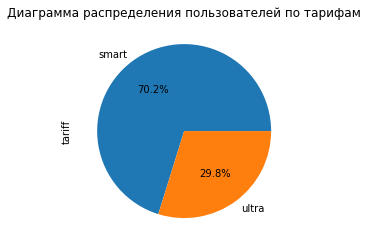

In [21]:
users_tariff.plot.pie(autopct='%.1f%%')
plt.title('Диаграмма распределения пользователей по тарифам')
plt.show()

In [22]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['month'] = pd.to_datetime(users['reg_date']).dt.month
users = users.rename(columns={'tariff':'tariff_name'})
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


Объединим таблицы в один датафрейм

In [23]:
data = users.merge(tariffs, on='tariff_name', how='outer')
data.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1000,30720,3000,1950,150,1,1
1,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8,1000,30720,3000,1950,150,1,1
2,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,1000,30720,3000,1950,150,1,1
3,1013,36,NaN,Иваново,Борис,Андреенко,2018-11-14,ultra,11,1000,30720,3000,1950,150,1,1
4,1016,58,NaN,Омск,Марица,Сазонова,2018-11-21,ultra,11,1000,30720,3000,1950,150,1,1


In [24]:
calls_internet = calls_grouped.merge(internet_grouped, on=['user_id', 'month'], how='outer')
calls_internet_messages = calls_internet.merge(messages_grouped, on=['user_id', 'month'], how='outer')
calls_internet_messages.head(10)

,user_id,month,duration_sum,duration_count,mb_used_sum,mb_used_count,sms
0,1000,5,159.0,17.0,2256.0,4.0,22.0
1,1000,6,172.0,28.0,23257.0,44.0,60.0
2,1000,7,340.0,41.0,14016.0,28.0,75.0
3,1000,8,408.0,42.0,14070.0,27.0,81.0
4,1000,9,466.0,46.0,14581.0,25.0,57.0
5,1000,10,350.0,44.0,14717.0,27.0,73.0
6,1000,11,338.0,37.0,14768.0,23.0,58.0
7,1000,12,333.0,38.0,9827.0,19.0,70.0
8,1001,11,430.0,45.0,18452.0,47.0,NaN
9,1001,12,414.0,47.0,14053.0,35.0,NaN


In [25]:
df = calls_internet_messages.merge(data, on='user_id', how='outer')
df.head(10)

,user_id,month_x,duration_sum,duration_count,mb_used_sum,mb_used_count,sms,age,churn_date,city,...,reg_date,tariff_name,month_y,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,17.0,2256.0,4.0,22.0,52,NaN,Краснодар,...,2018-05-25,ultra,5,1000,30720,3000,1950,150,1,1
1,1000,6.0,172.0,28.0,23257.0,44.0,60.0,52,NaN,Краснодар,...,2018-05-25,ultra,5,1000,30720,3000,1950,150,1,1
2,1000,7.0,340.0,41.0,14016.0,28.0,75.0,52,NaN,Краснодар,...,2018-05-25,ultra,5,1000,30720,3000,1950,150,1,1
3,1000,8.0,408.0,42.0,14070.0,27.0,81.0,52,NaN,Краснодар,...,2018-05-25,ultra,5,1000,30720,3000,1950,150,1,1
4,1000,9.0,466.0,46.0,14581.0,25.0,57.0,52,NaN,Краснодар,...,2018-05-25,ultra,5,1000,30720,3000,1950,150,1,1
5,1000,10.0,350.0,44.0,14717.0,27.0,73.0,52,NaN,Краснодар,...,2018-05-25,ultra,5,1000,30720,3000,1950,150,1,1
6,1000,11.0,338.0,37.0,14768.0,23.0,58.0,52,NaN,Краснодар,...,2018-05-25,ultra,5,1000,30720,3000,1950,150,1,1
7,1000,12.0,333.0,38.0,9827.0,19.0,70.0,52,NaN,Краснодар,...,2018-05-25,ultra,5,1000,30720,3000,1950,150,1,1
8,1001,11.0,430.0,45.0,18452.0,47.0,NaN,41,NaN,Москва,...,2018-11-01,smart,11,50,15360,500,550,200,3,3
9,1001,12.0,414.0,47.0,14053.0,35.0,NaN,41,NaN,Москва,...,2018-11-01,smart,11,50,15360,500,550,200,3,3


После объединения данных в итоговой таблицу у нас появились значения NaN, они появились в тех ячейках, где нет данных. Заменим их значения на 0.

In [26]:
df.isnull().sum()

user_id                     0
month_x                     2
duration_sum               48
duration_count             48
mb_used_sum                15
mb_used_count              15
sms                       499
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff_name                 0
month_y                     0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [27]:
df = df.fillna(0)

Подсчитаем помесячную выручку с каждого пользователя: выручка с звонков `call_fee`, с интернета `int_fee`, переведенного в Гб,  с смс-сообщений`sms_fee`.  `total_fee` - это общая выручка со всех услуг, включая абонентскую плану за тариф в месяц.
Соответствующие столбцы добавлены в таблицу.
Полученный результат по интернету округлили в большую сторону после перевода мегабайт в гигабайты.   

In [28]:
df['call_fee'] =  ( df['duration_sum'] - df['minutes_included'] ) * df['rub_per_minute']
df.loc[df['call_fee'] < 0, 'call_fee'] = 0

df['int_fee'] = np.ceil(( df['mb_used_sum'] - df['mb_per_month_included'] ) / 1024) *  df['rub_per_gb']
df.loc[df['int_fee'] < 0, 'int_fee'] = 0

df['sms_fee'] = ( df['sms'] - df['messages_included'] ) *  df['rub_per_message']
df.loc[df['sms_fee'] < 0, 'sms_fee'] = 0

df['total_fee'] = df['call_fee'] + df['int_fee'] + df['sms_fee'] + df['rub_monthly_fee']
df.head(10)

,user_id,month_x,duration_sum,duration_count,mb_used_sum,mb_used_count,sms,age,churn_date,city,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_fee,int_fee,sms_fee,total_fee
0,1000,5.0,159.0,17.0,2256.0,4.0,22.0,52,0,Краснодар,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,6.0,172.0,28.0,23257.0,44.0,60.0,52,0,Краснодар,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,7.0,340.0,41.0,14016.0,28.0,75.0,52,0,Краснодар,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,8.0,408.0,42.0,14070.0,27.0,81.0,52,0,Краснодар,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,9.0,466.0,46.0,14581.0,25.0,57.0,52,0,Краснодар,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
5,1000,10.0,350.0,44.0,14717.0,27.0,73.0,52,0,Краснодар,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
6,1000,11.0,338.0,37.0,14768.0,23.0,58.0,52,0,Краснодар,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
7,1000,12.0,333.0,38.0,9827.0,19.0,70.0,52,0,Краснодар,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
8,1001,11.0,430.0,45.0,18452.0,47.0,0.0,41,0,Москва,...,15360,500,550,200,3,3,0.0,800.0,0.0,1350.0
9,1001,12.0,414.0,47.0,14053.0,35.0,0.0,41,0,Москва,...,15360,500,550,200,3,3,0.0,0.0,0.0,550.0


После объединения данных в итоговой таблицу у нас появились значения NaN, они появились в тех ячейках, где нет данных. Заменим их значения на 0.

In [29]:
df.isnull().sum()

user_id                  0
month_x                  0
duration_sum             0
duration_count           0
mb_used_sum              0
mb_used_count            0
sms                      0
age                      0
churn_date               0
city                     0
first_name               0
last_name                0
reg_date                 0
tariff_name              0
month_y                  0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
call_fee                 0
int_fee                  0
sms_fee                  0
total_fee                0
dtype: int64

#### Вывод
Обработали данные таблиц, пропущенных значений нет, убрали нулевые значения длительности разговора и интернет-трафика, которые влияли на среднее.

Все начальные таблицы были сгруппированы по парам пользователь-месяц и объединены в один датафрейм. Были подсчитаны необходимые для проекта данные - количество сделанных звонков и израсходованных минут разговора, количество сообщений смс и объем израсходованного интернет-трафика по месяцам. Подсчитали помесячную выручку с каждого пользователя. 

### Шаг 3. Анализ данных.

Создадим выборку пользователей с тарифом Ультра и Смарт

In [30]:
df_ultra = df.query('tariff_name == "ultra"')
df_smart = df.query('tariff_name == "smart"')

Функция для расчета среднего, дисперсии, стандартного отклонения в серии и построения гистограмм.

In [31]:
def df_stat2(df1, df2, x, label1, label2, xlim1, xlim2):
    print('                         ', label1, '      ', label2)
    print(50*'-')
    print('Среднее                {: >10.2f}  {: >10.2f}'.format(df1[x].mean(), df2[x].mean()))
    print('Дисперсия              {: >10.2f}  {: >10.2f}'.format(np.var(df1[x], ddof=1), np.var(df2[x], ddof=1)))
    print('Стандартное отклонение {: >10.2f}  {: >10.2f}'.format(np.std(df1[x], ddof=1), np.std(df2[x], ddof=1)))
    
    fig, axs = plt.subplots()
    df1[x].plot(kind='hist', alpha=0.5, ax=axs, legend=True, label=label1)
    df2[x].plot(kind='hist', alpha=0.5, ax=axs, legend=True, label=label2)
    
    axs.axvline(x=xlim1, label='limit')
    axs.axvline(x=xlim2, label='limit', color='red')
    axs.axvline(x=df1[x].mean(), ls='--', label='mean')
    axs.axvline(x=df2[x].mean(), ls='--', label='mean', color='red')
    axs.legend()

Анализ по минутам разговора

                          ultra        smart
--------------------------------------------------
Среднее                    526.09      417.75
Дисперсия               101052.49    36281.39
Стандартное отклонение     317.89      190.48


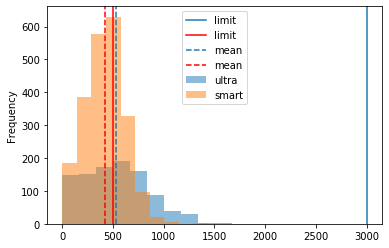

In [32]:
df_stat2(df_ultra, df_smart, 'duration_sum', 'ultra', 'smart', 3000, 500)

Из графика видно, что пользователя тарифа Смарт говорят меньше по длительности, но совершают звонки чаще, чем пользователи Ультра.

Анализ по количеству сообщений

                          ultra        smart
--------------------------------------------------
Среднее                     49.31       33.37
Дисперсия                 2285.42      796.96
Стандартное отклонение      47.81       28.23


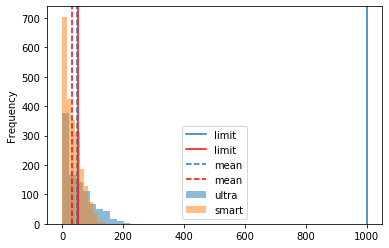

In [33]:
df_stat2(df_ultra, df_smart, 'sms', 'ultra', 'smart', 1000, 50)

В среднем в месяц посылается 30-50 смс, это совсем немного, что связано с массовым переходом людей на мессенджеры.  Распределение не имеет никакого отношения к нормальному, о чем говорит и высокие значения дисперсии.

Анализ по объему интернет-трафика

                          ultra        smart
--------------------------------------------------
Среднее                  19467.14    16221.91
Дисперсия              102217264.28  34648523.30
Стандартное отклонение   10110.26     5886.30


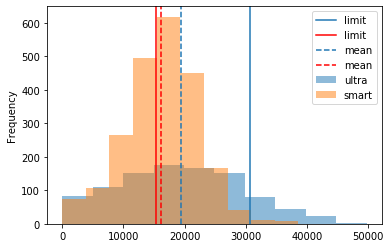

In [34]:
df_stat2(df_ultra, df_smart, 'mb_used_sum', 'ultra', 'smart', 30720, 15360)

Средние значения по расходуемому трафику у пользователей двух тарифов близки, при этом те, кто пользуется тарифом Смарт выходят в интернет гораздо чаще. Распределение близко к нормальному.

Значения среднего, стандартного отклонения по нужным нам параметрам можно было также вычислить, используя функцию describe()

In [35]:
df_ultra[['duration_sum', 'mb_used_sum', 'sms', 'total_fee']].describe().style.format('{:.2f}')

,duration_sum,mb_used_sum,sms,total_fee
count,986.00,986.00,986.00,986.00
mean,526.09,19467.14,49.31,2070.94
std,317.89,10110.26,47.81,378.63
min,0.00,0.00,0.00,1950.00
25%,282.50,11761.00,6.00,1950.00
50%,518.00,19320.00,38.00,1950.00
75%,751.75,26860.25,78.75,1950.00
max,1673.00,49789.00,224.00,4800.00


In [36]:
df_smart[['duration_sum', 'mb_used_sum', 'sms', 'total_fee']].describe().style.format('{:.2f}')

,duration_sum,mb_used_sum,sms,total_fee
count,2230.00,2230.00,2230.00,2230.00
mean,417.75,16221.91,33.37,1294.31
std,190.48,5886.30,28.23,820.90
min,0.00,0.00,0.00,550.00
25%,282.00,12645.25,10.00,550.00
50%,421.50,16529.00,28.00,1037.00
75%,545.00,20068.00,51.00,1750.00
max,1435.00,38610.00,143.00,6770.00


#### Вывод
В целом при сравнении пользователей двух тарифов можно сделать выводы: пользователя тарифа Смарт говорят меньше по длительности, но совершают звонки чаще, чем пользователи Ультра. Такая же ситуация и с интернет-трафиком. Смс-сообщений пользователи обоих тарифов отправляют немного, но пользователи тарифа Ультра все-таки больше.

### Шаг 4. Проверка гипотез.

Проверим нулевую гипотезу - средняя выручка пользователей тарифов Ультра и Смарт одинаковая. 

Альтернативная гипотеза - средняя выручка пользователей одного из тарифов больше,чем другого. 

Используем Т-тест для проверки равенства среднего двух генеральных совокупностей по взятым из них выборкам. 
Параметр equal_var=True используется для теста 2 выборок c предположительно равными дисперсиями. В нашем случае значения дисперсий значительно отличаются (в случае сравнения средней выручки пользователей тарифов Ультра и Смарт почти в 5 раз), поэтому использовали equal_var=False.

In [37]:
alpha = 0.05

result = st.ttest_ind(df_smart['total_fee'], df_ultra['total_fee'], equal_var=False)
print('р-значение:', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение: 1.2414049931248708e-246
Отвергаем нулевую гипотезу


Следовательно, выручка пользователей по тарифам Ультра и Смарт отличается.

                          ultra        smart
--------------------------------------------------
Среднее                   2070.94     1294.31
Дисперсия               143360.43   673877.62
Стандартное отклонение     378.63      820.90


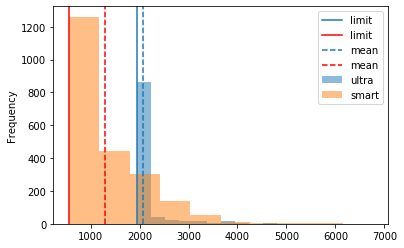

In [38]:
df_stat2(df_ultra, df_smart, 'total_fee', 'ultra', 'smart', 1950, 550)

Ультра-тариф с дорогой абоненской платой, с большим количеством включенных в нее минут разговора, Мб интернета и сообщений. Большинство пользователей этого тарифа укладываются в абоненскую плату и не переплачивают сверху. В то время, как по тарифу Смарт достаточно большее число пользователей платит сверху абоненской платы, не укладываясь в лимиты. Об этом говорит и среднее значение (абоненская плата за тариф 550 рублей, в то время, как средняя выручка составляет 1233 рубля в месяц).

In [39]:
df_ultra_moscow = df_ultra.query('city == "Москва"')
df_ultra_regions = df_ultra.query('city != "Москва"')
df_smart_moscow = df_smart.query('city == "Москва"')
df_smart_regions = df_smart.query('city != "Москва"')

Проверим нулевую гипотезу - средняя выручка пользователей тарифов Ультра и Смарт из Москвы равна выручке пользователям в регионах. 

Альтернативная гипотеза - средняя выручка пользователей из Москвы больше,чем в регионах. 

Используем Т-тест для проверки равенства среднего двух генеральных совокупностей по взятым из них выборкам. 

Проверим для тарифа Смарт

In [40]:
alpha = 0.05

result = st.ttest_ind(df_smart_moscow['total_fee'], df_smart_regions['total_fee'], equal_var=False)
print('р-значение:', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение: 0.1671050833966643
Не получилось отвергнуть нулевую гипотезу


                          Москва        регионы
--------------------------------------------------
Среднее                   1245.06     1304.61
Дисперсия               570033.28   695321.88
Стандартное отклонение     755.01      833.86


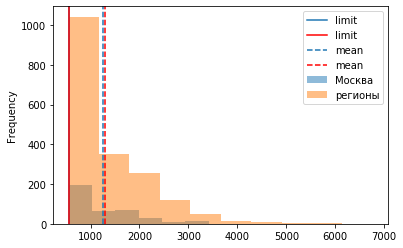

In [41]:
df_stat2(df_smart_moscow, df_smart_regions, 'total_fee', 'Москва', 'регионы', 550, 550)

Выручка пользователей тарифа Смарт в Москве и регионах не отличается. Пользователей в регионах на этом тарифе больше.

Проверим для тарифа Ультра

In [42]:
alpha = 0.05

result = st.ttest_ind(df_ultra_moscow['total_fee'], df_ultra_regions['total_fee'], equal_var=False)
print('р-значение:', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение: 0.8355530456320814
Не получилось отвергнуть нулевую гипотезу


                          Москва        регионы
--------------------------------------------------
Среднее                   2075.33     2069.65
Дисперсия               124645.54   149057.64
Стандартное отклонение     353.05      386.08


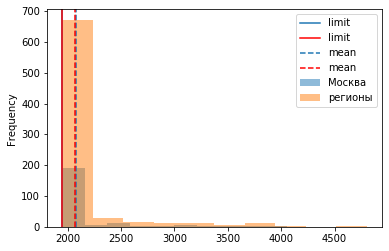

In [43]:
df_stat2(df_ultra_moscow, df_ultra_regions, 'total_fee', 'Москва', 'регионы', 1950, 1950)

Выручка пользователей тарифа Ультра в Москве и регионах также не отличается. Пользователей в регионах и на этом тарифе больше.

#### Вывод
Выручка пользователей по тарифам Ультра и Смарт отличается. 
Ультра-тариф с дорогой абоненской платой, с большим количеством включенных в нее минут разговора, Мб интернета и сообщений. Большинство пользователей этого тарифа укладываются в абоненскую плату и не переплачивают сверху. 

В то время, как по тарифу Смарт достаточно большее число пользователей платит сверху абоненской платы, не укладываясь в лимиты. Об этом говорит и среднее значение (абоненская плата за тариф 550 рублей, в то время, как средняя выручка составляет 1233 рубля в месяц).
Если сравнивать Москву и остальные города России, то выручка пользователей не отличается в обоих тарифах. 

### Шаг 5. Общий вывод.

Проанализировали данные компании. Скорректировали пропущенные значения, изменили тип данных нескольких колонок для более быстрой и удобной обработки, округлили количество минут разговора и мегабайт интернета до целых чисел вверх, поскольку таким образом поступает оператор «Мегалайн». Объединили все данные в один датафрейм, сгруппировав по конкретному клиенту и месяцу расхода. Рассчитали необходимые для проекта параметры, в том числе помесячную выручку с каждого пользователя.
Исходя из анализа нашей выборки можно сделать следующий вывод, что тариф Смарт приносит больше дохода компании, чем тариф Ультра. Большинство пользователей Ультра укладываются в абоненскую плату и не переплачивают сверху. В то время, как по тарифу Смарт достаточно большее число пользователей платит дополнительно абоненской платы, не укладываясь в лимиты. эти данные подтверждаются для обоих тарифов в Москве и регионах. Пользователя тарифа Смарт говорят меньше по длительности, но совершают звонки чаще, чем пользователи Ультра. Такая же ситуация и с интернет-трафиком. Смс-сообщений пользователи обоих тарифов отправляют немного.
Поскольку выборка случайная, можно перенести этот анализ на всю генеральную совокупность, то есть тариф Смарт является для компании «Мегалайн» более выгодным.